In [5]:
import pandas as pd
import numpy as np


features = pd.read_csv("/content/drive/MyDrive/academics/2ndyear/3/mini_project/img_csv/features.csv", header=None)
labels = pd.read_csv("/content/drive/MyDrive/academics/2ndyear/3/mini_project/img_csv/labels.csv", header=None)

In [45]:
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
column = features.columns[0]

X = []
Y = np.array(labels)

for i in features[column]:
  temp = np.array([float(x) for x in i.split(" ")])
  X.append(temp)

X = np.array(X)
X.shape, labels.shape

((7127, 276), (7127, 1))

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, random_state=22)
pca.fit(X)
X = pca.transform(X)

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X = lda.fit_transform(X, Y.ravel())

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.85, random_state=5)

In [76]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_lr))

0.8956751403103335


In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

gnb = GaussianNB()
scores = model_selection.cross_val_score(gnb, X_train, y_train.ravel(), cv=10, scoring='accuracy')

print("Mean Score", scores.mean())

Mean Score 0.9074325515782048


In [81]:
from sklearn import svm

clf = svm.SVC(gamma='auto',kernel='linear')
clf.fit(X_train, y_train.ravel())
y_pred_svm = clf.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_svm))

0.8956751403103335


In [84]:
X.shape

(7127, 1)

In [69]:
yu = [4 for _ in range(len(X))]
yu = np.array(yu)

(7127, 276)

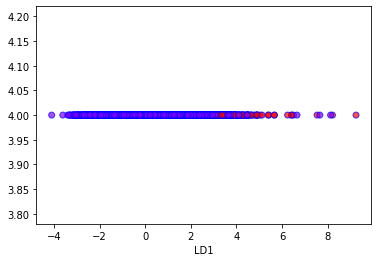

In [85]:
plt.xlabel('LD1')
plt.scatter(
    X,
    yu,
    c=Y.ravel(),
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [88]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 7)  
  
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8537471112578409


In [87]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy")


clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8517662594915814
